In [ ]:
import numpy as np
import torch
import torch.utils.data as data_utils
from torchvision import datasets, transforms


class MnistBags(data_utils.Dataset):
    def __init__(self, target_number=9, mean_bag_length=10, var_bag_length=2, num_bag=250, seed=1, train=True):
        self.target_number = target_number
        self.mean_bag_length = mean_bag_length
        self.var_bag_length = var_bag_length
        self.num_bag = num_bag
        self.train = train

        self.r = np.random.RandomState(seed)

        self.num_in_train = 60000
        self.num_in_test = 10000

        if self.train:
            self.train_bags_list, self.train_labels_list = self._create_bags()
        else:
            self.test_bags_list, self.test_labels_list = self._create_bags()

    def _create_bags(self):
        if self.train:
            loader = data_utils.DataLoader(datasets.MNIST('../datasets',
                                                          train=True,
                                                          download=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(),
                                                              transforms.Normalize((0.1307,), (0.3081,))])),
                                           batch_size=self.num_in_train,
                                           shuffle=False)
        else:
            loader = data_utils.DataLoader(datasets.MNIST('../datasets',
                                                          train=False,
                                                          download=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(),
                                                              transforms.Normalize((0.1307,), (0.3081,))])),
                                           batch_size=self.num_in_test,
                                           shuffle=False)

        for (batch_data, batch_labels) in loader:
            all_imgs = batch_data
            all_labels = batch_labels

        bags_list = []
        labels_list = []

        for i in range(self.num_bag):
            bag_length = np.int(self.r.normal(self.mean_bag_length, self.var_bag_length, 1))
            if bag_length < 1:
                bag_length = 1

            if self.train:
                indices = torch.LongTensor(self.r.randint(0, self.num_in_train, bag_length))
            else:
                indices = torch.LongTensor(self.r.randint(0, self.num_in_test, bag_length))

            labels_in_bag = all_labels[indices]
            labels_in_bag = labels_in_bag == self.target_number

            bags_list.append(all_imgs[indices])
            labels_list.append(labels_in_bag)

        return bags_list, labels_list

    def __len__(self):
        if self.train:
            return len(self.train_labels_list)
        else:
            return len(self.test_labels_list)

    def __getitem__(self, index):
        if self.train:
            bag = self.train_bags_list[index]
            label = [max(self.train_labels_list[index]), self.train_labels_list[index]]
        else:
            bag = self.test_bags_list[index]
            label = [max(self.test_labels_list[index]), self.test_labels_list[index]]

        return bag, label


if __name__ == "__main__":

    train_loader = data_utils.DataLoader(MnistBags(target_number=9,
                                                   mean_bag_length=10,
                                                   var_bag_length=2,
                                                   num_bag=100,
                                                   seed=1,
                                                   train=True),
                                         batch_size=1,
                                         shuffle=True)

    test_loader = data_utils.DataLoader(MnistBags(target_number=9,
                                                  mean_bag_length=10,
                                                  var_bag_length=2,
                                                  num_bag=100,
                                                  seed=1,
                                                  train=False),
                                        batch_size=1,
                                        shuffle=False)

    len_bag_list_train = []
    mnist_bags_train = 0
    for batch_idx, (bag, label) in enumerate(train_loader):
        len_bag_list_train.append(int(bag.squeeze(0).size()[0]))
        mnist_bags_train += label[0].numpy()[0]
    print('Number positive train bags: {}/{}\n'
          'Number of instances per bag, mean: {}, max: {}, min {}\n'.format(
        mnist_bags_train, len(train_loader),
        np.mean(len_bag_list_train), np.max(len_bag_list_train), np.min(len_bag_list_train)))

    len_bag_list_test = []
    mnist_bags_test = 0
    for batch_idx, (bag, label) in enumerate(test_loader):
        len_bag_list_test.append(int(bag.squeeze(0).size()[0]))
        mnist_bags_test += label[0].numpy()[0]
    print('Number positive test bags: {}/{}\n'
          'Number of instances per bag, mean: {}, max: {}, min {}\n'.format(
        mnist_bags_test, len(test_loader),
        np.mean(len_bag_list_test), np.max(len_bag_list_test), np.min(len_bag_list_test)))


Number positive train bags: 61/100
Number of instances per bag, mean: 9.47, max: 14, min 4

Number positive test bags: 56/100
Number of instances per bag, mean: 9.7, max: 15, min 5



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data as data_utils
from torchvision import datasets, transforms


class MnistBags(data_utils.Dataset):
    def __init__(self, target_number=9, mean_bag_length=10, var_bag_length=1, num_bag=1000, seed=7, train=True):
        self.target_number = target_number
        self.mean_bag_length = mean_bag_length
        self.var_bag_length = var_bag_length
        self.num_bag = num_bag
        self.seed = seed
        self.train = train

        self.r = np.random.RandomState(seed)

        self.num_in_train = 60000
        self.num_in_test = 10000

        if self.train:
            self.train_bags_list, self.train_labels_list = self._form_bags()
        else:
            self.test_bags_list, self.test_labels_list = self._form_bags()

    def _form_bags(self):
        if self.train:
            train_loader = data_utils.DataLoader(datasets.MNIST('../datasets',
                                                                train=True,
                                                                download=True,
                                                                transform=transforms.Compose([
                                                                         transforms.ToTensor(),
                                                                         transforms.Normalize((0.1307,), (0.3081,))])),
                                                 batch_size=self.num_in_train,
                                                 shuffle=False)

            bags_list = []
            labels_list = []
            valid_bags_counter = 0
            label_of_last_bag = 0

            for batch_data in train_loader:
                numbers = batch_data[0]
                labels = batch_data[1]

            while valid_bags_counter < self.num_bag:
                bag_length = np.int(self.r.normal(self.mean_bag_length, self.var_bag_length, 1))
                if bag_length < 1:
                    bag_length = 1
                indices = torch.LongTensor(self.r.randint(0, self.num_in_train, bag_length))
                labels_in_bag = labels[indices]

                if (self.target_number in labels_in_bag) and (label_of_last_bag == 0):
                    labels_in_bag = labels_in_bag >= self.target_number
                    labels_list.append(labels_in_bag)
                    bags_list.append(numbers[indices])
                    label_of_last_bag = 1
                    valid_bags_counter += 1
                elif label_of_last_bag == 1:
                    index_list = []
                    bag_length_counter = 0
                    while bag_length_counter < bag_length:
                        index = torch.LongTensor(self.r.randint(0, self.num_in_train, 1))
                        label_temp = labels[index]
                        if label_temp.numpy()[0] != self.target_number:
                            index_list.append(index)
                            bag_length_counter += 1

                    index_list = np.array(index_list)
                    labels_in_bag = labels[index_list]
                    labels_in_bag = labels_in_bag >= self.target_number
                    labels_list.append(labels_in_bag)
                    bags_list.append(numbers[index_list])
                    label_of_last_bag = 0
                    valid_bags_counter += 1
                else:
                    pass

        else:
            test_loader = data_utils.DataLoader(datasets.MNIST('../datasets',
                                                               train=False,
                                                               download=True,
                                                               transform=transforms.Compose([
                                                                    transforms.ToTensor(),
                                                                    transforms.Normalize((0.1307,), (0.3081,))])),
                                                batch_size=self.num_in_test,
                                                shuffle=False)

            bags_list = []
            labels_list = []
            valid_bags_counter = 0
            label_of_last_bag = 0

            for batch_data in test_loader:
                numbers = batch_data[0]
                labels = batch_data[1]

            while valid_bags_counter < self.num_bag:
                bag_length = np.int(self.r.normal(self.mean_bag_length, self.var_bag_length, 1))
                if bag_length < 1:
                    bag_length = 1
                indices = torch.LongTensor(self.r.randint(0, self.num_in_test, bag_length))
                labels_in_bag = labels[indices]

                if (self.target_number in labels_in_bag) and (label_of_last_bag == 0):
                    labels_in_bag = labels_in_bag >= self.target_number
                    labels_list.append(labels_in_bag)
                    bags_list.append(numbers[indices])
                    label_of_last_bag = 1
                    valid_bags_counter += 1
                elif label_of_last_bag == 1:
                    index_list = []
                    bag_length_counter = 0
                    while bag_length_counter < bag_length:
                        index = torch.LongTensor(self.r.randint(0, self.num_in_test, 1))
                        label_temp = labels[index]
                        if label_temp.numpy()[0] != self.target_number:
                            index_list.append(index)
                            bag_length_counter += 1

                    index_list = np.array(index_list)
                    labels_in_bag = labels[index_list]
                    labels_in_bag = labels_in_bag >= self.target_number
                    labels_list.append(labels_in_bag)
                    bags_list.append(numbers[index_list])
                    label_of_last_bag = 0
                    valid_bags_counter += 1
                else:
                    pass

        return bags_list, labels_list

    def __len__(self):
        if self.train:
            return len(self.train_labels_list)
        else:
            return len(self.test_labels_list)

    def __getitem__(self, index):
        if self.train:
            bag = self.train_bags_list[index]
            label = [max(self.train_labels_list[index]), self.train_labels_list[index]]
        else:
            bag = self.test_bags_list[index]
            label = [max(self.test_labels_list[index]), self.test_labels_list[index]]

        return bag, label


if __name__ == "__main__":
    to_pil = transforms.Compose([transforms.ToPILImage()])

    kwargs = {}
    batch_size = 1

    train_loader = data_utils.DataLoader(MnistBags(target_number=9,
                                                   mean_bag_length=10,
                                                   var_bag_length=2,
                                                   num_bag=100,
                                                   seed=98,
                                                   train=True),
                                         batch_size=batch_size,
                                         shuffle=False, **kwargs)

    test_loader = data_utils.DataLoader(MnistBags(target_number=9,
                                                  mean_bag_length=10,
                                                  var_bag_length=2,
                                                  num_bag=10,
                                                  seed=98,
                                                  train=False),
                                        batch_size=batch_size,
                                        shuffle=False, **kwargs)

    len_bag_list = []
    mnist_bags_train = 0
    for batch_idx, data in enumerate(train_loader):
        plot_data = data[0].squeeze(0)
        len_bag_list.append(int(plot_data.size()[0]))
        if data[1][0][0] == 1:
            mnist_bags_train += 1
    print('number of bags with 9(s): ', mnist_bags_train)
    print('total number of bags', len(train_loader))
    print(np.mean(len_bag_list), np.min(len_bag_list), np.max(len_bag_list))

    len_bag_list = []
    mnist_bags_test = 0
    for batch_idx, data in enumerate(test_loader):
        plot_data = data[0].squeeze(0)
        len_bag_list.append(int(plot_data.size()[0]))
        if data[1][0][0] == 1:
            mnist_bags_test += 1
    print('number of bags with 9(s): ', mnist_bags_test)
    print('total number of bags', len(test_loader))
    print(np.mean(len_bag_list), np.min(len_bag_list), np.max(len_bag_list))

number of bags with 9(s):  50
total number of bags 100
9.72 5 14
number of bags with 9(s):  5
total number of bags 10
10.6 9 13


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Attention(nn.Module):
    def __init__(self):
        super(Attention, self).__init__()
        self.L = 500
        self.D = 128
        self.K = 1

        self.feature_extractor_part1 = nn.Sequential(
            nn.Conv2d(1, 20, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(20, 50, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )

        self.feature_extractor_part2 = nn.Sequential(
            nn.Linear(50 * 4 * 4, self.L),
            nn.ReLU(),
        )

        self.attention = nn.Sequential(
            nn.Linear(self.L, self.D),
            nn.Tanh(),
            nn.Linear(self.D, self.K)
        )

        self.classifier = nn.Sequential(
            nn.Linear(self.L*self.K, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.squeeze(0)
        H = self.feature_extractor_part1(x)
        H = H.view(-1, 50 * 4 * 4)
        H = self.feature_extractor_part2(H) 

        A = self.attention(H)  
        A = torch.transpose(A, 1, 0)  
        A = F.softmax(A, dim=1)  
        M = torch.mm(A, H)  
        Y_prob = self.classifier(M)
        Y_hat = torch.ge(Y_prob, 0.5).float()

        return Y_prob, Y_hat, A

    def calculate_classification_error(self, X, Y):
        Y = Y.float()
        _, Y_hat, _ = self.forward(X)
        error = 1. - Y_hat.eq(Y).cpu().float().mean().item()
        return error, Y_hat

    def calculate_objective(self, X, Y):
        Y = Y.float()
        Y_prob, _, A = self.forward(X)
        Y_prob = torch.clamp(Y_prob, min=1e-5, max=1. - 1e-5)
        neg_log_likelihood = -1. * (Y * torch.log(Y_prob) + (1. - Y) * torch.log(1. - Y_prob)) 

        return neg_log_likelihood, A



Load Train and Test Set
Init Model
Start Training
Epoch: 1, Loss: 0.6983, Train error: 0.4950
Epoch: 2, Loss: 0.7066, Train error: 0.4600
Epoch: 3, Loss: 0.4220, Train error: 0.2100
Epoch: 4, Loss: 0.2315, Train error: 0.0900
Epoch: 5, Loss: 0.1620, Train error: 0.0650
Epoch: 6, Loss: 0.0918, Train error: 0.0300
Epoch: 7, Loss: 0.0692, Train error: 0.0200
Epoch: 8, Loss: 0.0767, Train error: 0.0250
Epoch: 9, Loss: 0.0153, Train error: 0.0000
Epoch: 10, Loss: 0.0038, Train error: 0.0000
Epoch: 11, Loss: 0.0013, Train error: 0.0000
Epoch: 12, Loss: 0.0008, Train error: 0.0000
Epoch: 13, Loss: 0.0007, Train error: 0.0000
Epoch: 14, Loss: 0.0004, Train error: 0.0000
Epoch: 15, Loss: 0.0003, Train error: 0.0000
Epoch: 16, Loss: 0.0003, Train error: 0.0000
Epoch: 17, Loss: 0.0002, Train error: 0.0000
Epoch: 18, Loss: 0.0002, Train error: 0.0000
Epoch: 19, Loss: 0.0001, Train error: 0.0000
Epoch: 20, Loss: 0.0001, Train error: 0.0000
Start Testing

True Bag Label, Predicted Bag Label: (True, 

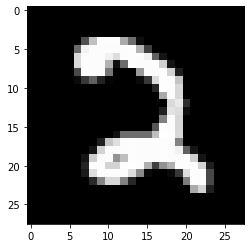

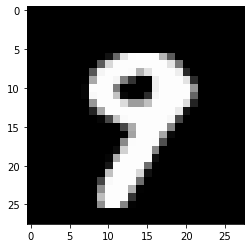

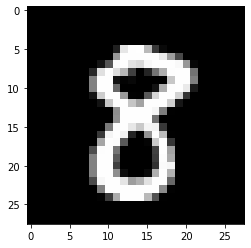

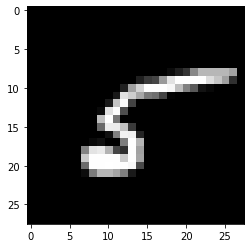

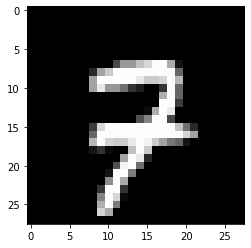

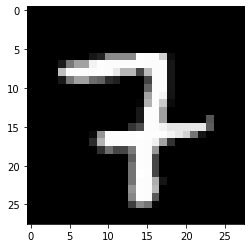

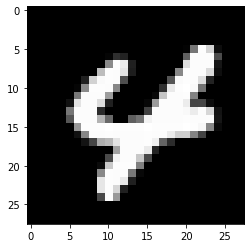

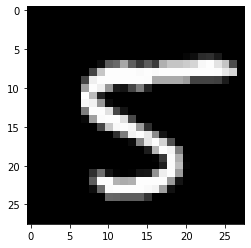

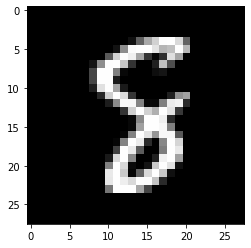

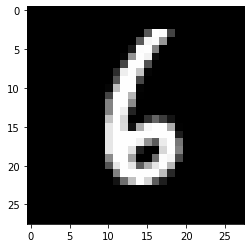

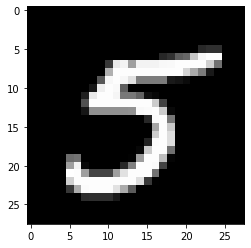

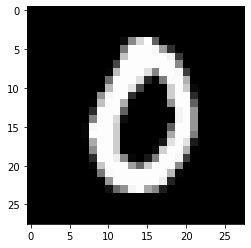

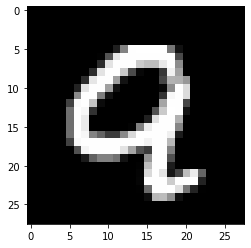


True Bag Label, Predicted Bag Label: (False, False)
True Instance Labels, Attention Weights: [(False, 0.6349999904632568), (False, 0.0), (False, 0.0), (False, 0.0), (False, 0.35199999809265137), (False, 0.0), (False, 0.012000000104308128), (False, 0.0)]


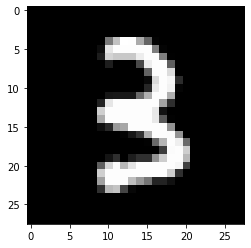

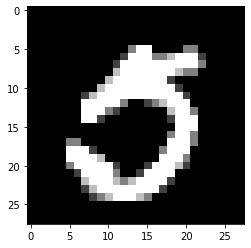

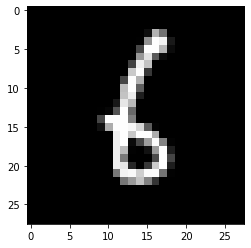

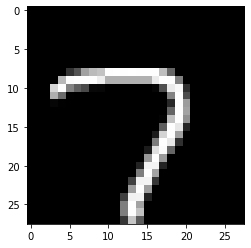

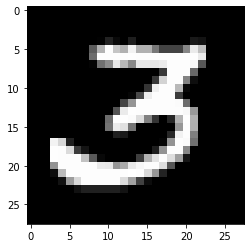

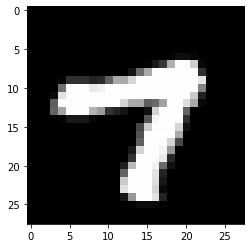

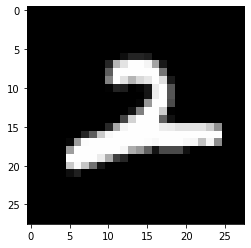

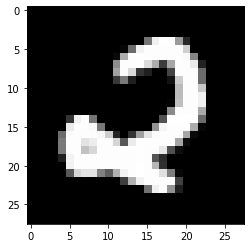


True Bag Label, Predicted Bag Label: (True, True)
True Instance Labels, Attention Weights: [(True, 0.5), (False, 0.0), (False, 0.003000000026077032), (False, 0.0), (False, 0.0), (True, 0.4970000088214874), (False, 0.0), (False, 0.0), (False, 0.0), (False, 0.0)]


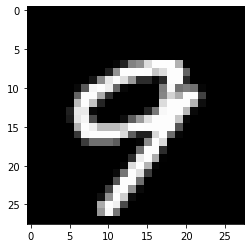

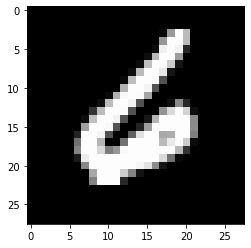

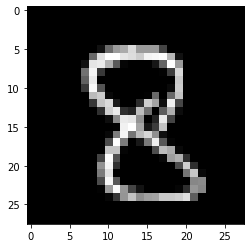

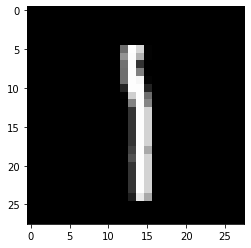

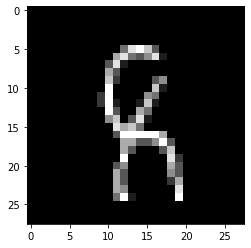

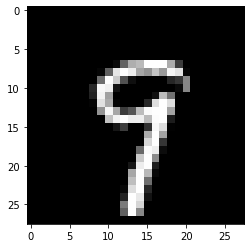

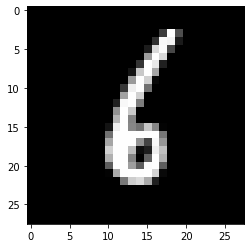

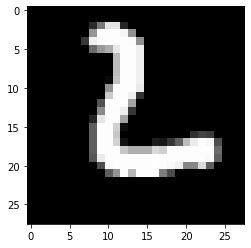

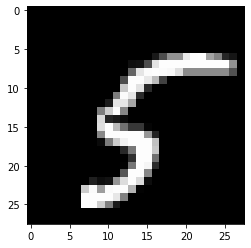

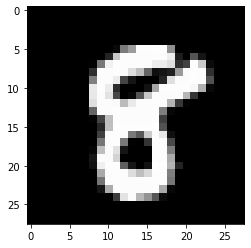


True Bag Label, Predicted Bag Label: (False, False)
True Instance Labels, Attention Weights: [(False, 0.0), (False, 0.07199999690055847), (False, 0.2879999876022339), (False, 0.25600001215934753), (False, 0.3700000047683716), (False, 0.0010000000474974513), (False, 0.006000000052154064), (False, 0.007000000216066837)]


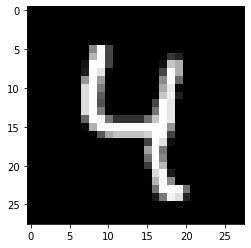

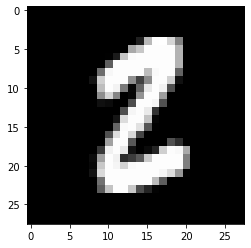

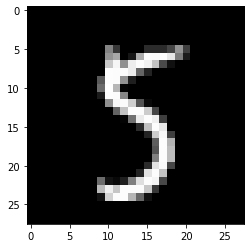

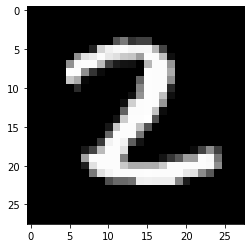

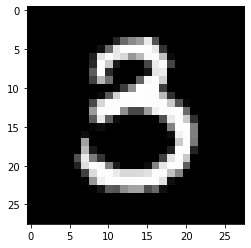

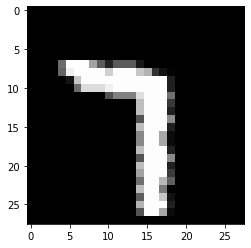

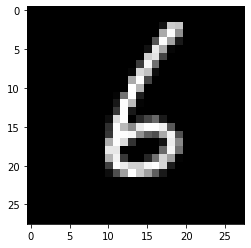

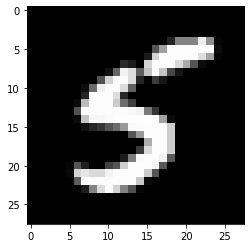


True Bag Label, Predicted Bag Label: (True, True)
True Instance Labels, Attention Weights: [(False, 0.0020000000949949026), (False, 0.0), (False, 0.0), (False, 0.0), (False, 0.0), (False, 0.0), (False, 0.0), (True, 0.9980000257492065)]


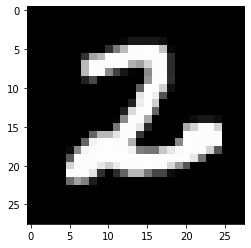

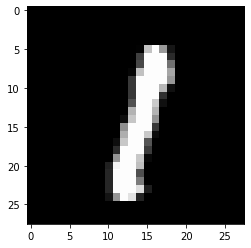

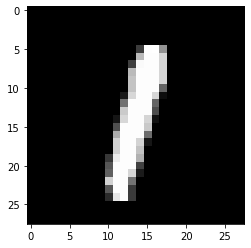

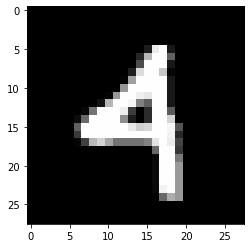

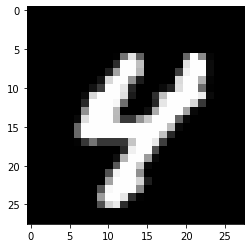

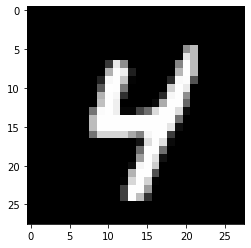

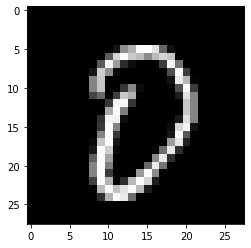

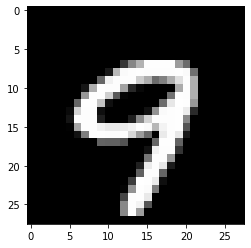


Test Set, Loss: 0.2649, Test error: 0.0400
Accuracy:  0.96


<Figure size 432x288 with 0 Axes>

In [ ]:
from __future__ import print_function

import numpy as np

import argparse
import torch
import torch.utils.data as data_utils
import torch.optim as optim
from torch.autograd import Variable
from sklearn.metrics import accuracy_score


parser = argparse.ArgumentParser(description='MNIST classification')
parser.add_argument('--target_number', type=int, default=9, metavar='T',
                    help='bags have a positive labels if they contain at least one 9')
parser.add_argument('--mean_bag_length', type=int, default=10, metavar='ML',
                    help='average bag length')
parser.add_argument('--var_bag_length', type=int, default=2, metavar='VL',
                    help='variance of bag length')
parser.add_argument('--num_bags_train', type=int, default=200, metavar='NTrain',
                    help='number of bags in training')
parser.add_argument('--num_bags_test', type=int, default=50, metavar='NTest',
                    help='number of bags in test')
parser.add_argument('--seed', type=int, default=1, metavar='S',
                    help='random seed (default: 1)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')

args, unknown = parser.parse_known_args()
args.cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)
    print('\nGPU is ON!')

print('Load Train and Test Set')
loader_kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}

train_loader = data_utils.DataLoader(MnistBags(target_number=args.target_number,
                                               mean_bag_length=args.mean_bag_length,
                                               var_bag_length=args.var_bag_length,
                                               num_bag=args.num_bags_train,
                                               seed=args.seed,
                                               train=True),
                                     batch_size=1,
                                     shuffle=True,
                                     **loader_kwargs)

test_loader = data_utils.DataLoader(MnistBags(target_number=args.target_number,
                                              mean_bag_length=args.mean_bag_length,
                                              var_bag_length=args.var_bag_length,
                                              num_bag=args.num_bags_test,
                                              seed=args.seed,
                                              train=False),
                                    batch_size=1,
                                    shuffle=False,
                                    **loader_kwargs)

print('Init Model')
model = Attention()
if args.cuda:
    model.cuda()

optimizer = optim.Adam(model.parameters(), lr=0.0005, betas=(0.9, 0.999), weight_decay=0.0001)


def train(epoch):
    model.train()
    train_loss = 0.
    train_error = 0.
    for batch_idx, (data, label) in enumerate(train_loader):
        bag_label = label[0]
        if args.cuda:
            data, bag_label = data.cuda(), bag_label.cuda()
        data, bag_label = Variable(data), Variable(bag_label)
        optimizer.zero_grad()
        loss, _ = model.calculate_objective(data, bag_label)
        train_loss += loss.data[0]
        error, _ = model.calculate_classification_error(data, bag_label)
        train_error += error
        loss.backward()
        optimizer.step()

    train_loss /= len(train_loader)
    train_error /= len(train_loader)

    print('Epoch: {}, Loss: {:.4f}, Train error: {:.4f}'.format(epoch, train_loss.cpu().numpy()[0], train_error))


def test():
    model.eval()
    test_loss = 0.
    test_error = 0.
    true_l=[]
    predicted_l=[]
    for batch_idx, (data, label) in enumerate(test_loader):
        bag_label = label[0]
        instance_labels = label[1]
        if args.cuda:
            data, bag_label = data.cuda(), bag_label.cuda()
        data, bag_label = Variable(data), Variable(bag_label)
        loss, attention_weights = model.calculate_objective(data, bag_label)
        test_loss += loss.data[0]
        error, predicted_label = model.calculate_classification_error(data, bag_label)
        test_error += error
        predict_label=True if(int(predicted_label.cpu().data.numpy()[0][0]) == 1) else False
        predicted_l.append(predict_label)
        true_l.append(bag_label.cpu().data.numpy()[0])

        plt.gray()
        

        if batch_idx < 5:  # Bag labels and instance labels for the first 5 bags
            bag_level = (bag_label.cpu().data.numpy()[0],predict_label)
            instance_level = list(zip(instance_labels.numpy()[0].tolist(),
                                 np.round(attention_weights.cpu().data.numpy()[0], decimals=3).tolist()))

            print('\nTrue Bag Label, Predicted Bag Label: {}\n'
                  'True Instance Labels, Attention Weights: {}'.format(bag_level, instance_level))
            for x in range(len(instance_level)):
              plt.imshow(data[0][x].reshape(28,28), cmap="gray")
              plt.show()
            
            

    test_error /= len(test_loader)
    test_loss /= len(test_loader)

    print('\nTest Set, Loss: {:.4f}, Test error: {:.4f}'.format(test_loss.cpu().numpy()[0], test_error))
    print('Accuracy: ',accuracy_score(true_l,predicted_l))
    


if __name__ == "__main__":
    for epoch in range(1, 21):
        train(epoch)
    test()
